In [1]:
from functions.load_training_data import training_samples, load_regression_samples, load_rescaled_samples
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time

# Load Training Samples

In [2]:
# start = time.time()
# image_samples, image_labels, mask_composites, full_images = training_samples(1000, [1,1,1,1], load_masks=True)
# print(time.time() - start)

77.44796895980835


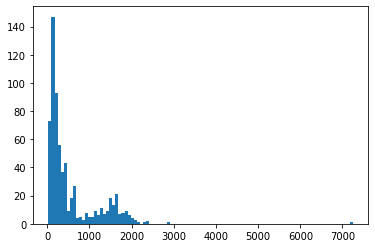

In [4]:
start = time.time()
cropped_triads = load_rescaled_samples()
print(time.time() - start)

In [ ]:
# start = time.time()
# cropped_imgs, cropped_masks, nuclei_sizes, labels = load_regression_samples(full_images, image_labels, mask_composites)
# print(time.time() - start)

In [ ]:
nuclei_sizes = []
cropped_masks = []
cropped_imgs = []
for triad in cropped_triads:
    nuclei_sizes.append(triad[0])
    cropped_masks.append(triad[1])
    cropped_imgs.append(triad[2])
nuclei_sizes[:2]

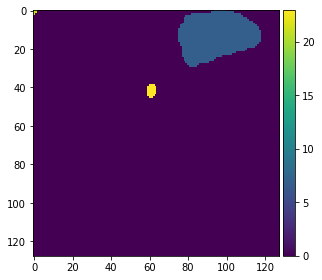

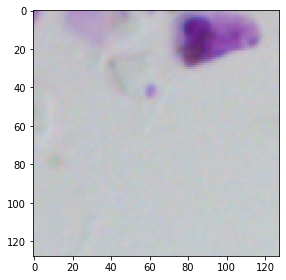

In [18]:
io.imshow(cropped_masks[1]); plt.figure()
io.imshow(cropped_imgs[1], cmap='nipy_spectral')

(array([2.396e+03, 1.190e+03, 3.562e+03, 1.525e+03, 1.408e+03, 1.131e+03,
        9.790e+02, 8.150e+02, 7.020e+02, 5.920e+02, 4.950e+02, 3.620e+02,
        3.290e+02, 2.510e+02, 2.090e+02, 1.770e+02, 1.750e+02, 1.480e+02,
        1.820e+02, 1.680e+02, 1.770e+02, 1.580e+02, 1.560e+02, 1.720e+02,
        1.600e+02, 1.710e+02, 1.860e+02, 1.760e+02, 1.220e+02, 1.600e+02,
        1.380e+02, 1.180e+02, 1.340e+02, 1.000e+02, 1.030e+02, 8.400e+01,
        8.900e+01, 6.000e+01, 7.300e+01, 5.700e+01, 6.400e+01, 5.900e+01,
        4.400e+01, 4.600e+01, 4.100e+01, 3.300e+01, 2.800e+01, 2.300e+01,
        3.300e+01, 2.300e+01, 2.900e+01, 1.500e+01, 1.900e+01, 2.400e+01,
        4.000e+00, 1.300e+01, 1.500e+01, 8.000e+00, 2.000e+00, 1.000e+01,
        9.000e+00, 3.000e+00, 5.000e+00, 5.000e+00, 4.000e+00, 3.000e+00,
        4.000e+00, 3.000e+00, 8.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

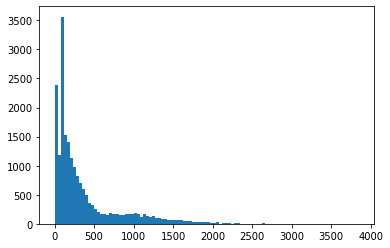

In [19]:
plt.hist(nuclei_sizes, bins=100)
# find the mean of all the values and divide by std. dev
# with mean and std. dev (x= (x-mean)/ std. dev) --> normalized nuclei sizes
# use np to find both ^

# Configure GPU

In [20]:
from functions.tf_config import config_gpu

config_gpu(4, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 4


# Configure Model

In [21]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, input_shape=(128, 128, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(8, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

In [22]:
predictions = model(cropped_imgs).numpy()
predictions

ValueError: input tensor must have rank 4

In [23]:
loss_fn = keras.losses.MeanAbsoluteError(
                reduction="auto", name="mean_absolute_error")
loss_fn(nuclei_sizes, predictions).numpy()

NameError: name 'predictions' is not defined

In [24]:
opt = keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=opt, loss=loss_fn, metrics="mean_absolute_error")

In [25]:
model.fit(cropped_imgs, nuclei_sizes, epochs=7, verbose=1)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'numpy.float64'>"})